<a href="https://colab.research.google.com/github/Archimedes58/Projects/blob/main/Train_%26_Run_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# show all outputs of a cell in a jupyter notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

In [1]:
# mount the google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# open the dataset on gdp and life satisfaction saved in the google drive
data = pd.read_csv('/content/drive/MyDrive/learning cluster/gdp_life_satisfaction.csv')

In [5]:
# show the first and last 5 rows of the dataset
data.head()
data.tail()

,index,Country,GDP per capita (USD),Life satisfaction
0,0,Russia,26456.38794,5.8
1,1,Greece,27287.08340,5.4
2,2,Turkey,28384.98778,5.5
3,3,Latvia,29932.49391,5.9
4,4,Hungary,31007.76841,5.6


,index,Country,GDP per capita (USD),Life satisfaction
20,20,Sweden,50683.32351,7.3
21,21,Germany,50922.35802,7.0
22,22,Austria,51935.60386,7.1
23,23,Iceland,52279.72885,7.5
24,24,Netherlands,54209.56384,7.4


In [8]:
print(data)

    index         Country  GDP per capita (USD)  Life satisfaction
0       0          Russia           26456.38794                5.8
1       1          Greece           27287.08340                5.4
2       2          Turkey           28384.98778                5.5
3       3          Latvia           29932.49391                5.9
4       4         Hungary           31007.76841                5.6
5       5        Portugal           32181.15454                5.4
6       6          Poland           32238.15726                6.1
7       7         Estonia           35638.42135                5.7
8       8           Spain           36215.44759                6.3
9       9        Slovenia           36547.73896                5.9
10     10       Lithuania           36732.03474                5.9
11     11          Israel           38341.30757                7.2
12     12           Italy           38992.14838                6.0
13     13  United Kingdom           41627.12927               

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 25 non-null     int64  
 1   Country               25 non-null     object 
 2   GDP per capita (USD)  25 non-null     float64
 3   Life satisfaction     25 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 928.0+ bytes


In [12]:
print(data.shape)

(25, 4)


In [ ]:
# report the basic statistics of the dataset
data.describe()

,index,GDP per capita (USD),Life satisfaction
count,25.000000,25.000000,25.000000
mean,12.000000,40242.725861,6.512000
std,7.359801,8691.449708,0.763392
min,0.000000,26456.387940,5.400000
25%,6.000000,32238.157260,5.900000
50%,12.000000,38992.148380,6.500000
75%,18.000000,48210.033110,7.300000
max,24.000000,54209.563840,7.600000


<Axes: xlabel='GDP per capita (USD)', ylabel='Life satisfaction'>

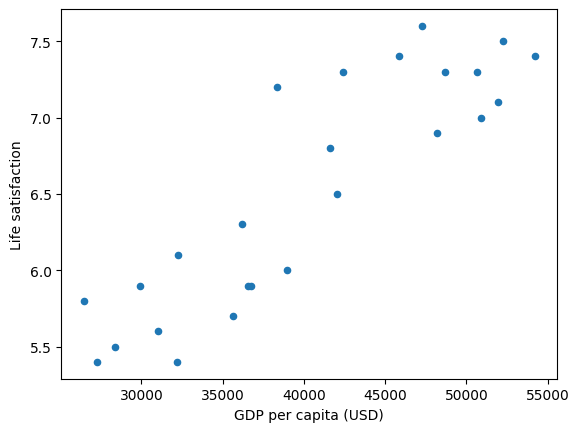

In [ ]:
# visualize the data
data.plot(kind = 'scatter', x = 'GDP per capita (USD)', y = 'Life satisfaction')


In [ ]:
# option 1: define the feature(s) X and target y (expand the second dimension for both X and y)
X = np.array(data["GDP per capita (USD)"])
X = np.expand_dims(X, axis = 1)
y = np.array(data["Life satisfaction"])
y = np.expand_dims(y, axis = 1)
print(X.shape)
print(y.shape)

(25, 1)
(25, 1)


In [ ]:
# option 2: define the feature(s) X and target y (expand the second dimension for both X and y)
X = np.array(data["GDP per capita (USD)"])
X = X.reshape(X.shape[0], 1)
y = np.array(data["Life satisfaction"])
y = y.reshape(y.shape[0], 1)
print(X.shape)
print(y.shape)

(25, 1)
(25, 1)


In [17]:
# option 3: define the feature(s) X and target y (expand the second dimension for both X and y)
X = np.c_[data["GDP per capita (USD)"]]
y = np.c_[data["Life satisfaction"]]
print(X.shape)
print(y.shape)

(25, 1)
(25, 1)


In [16]:
# select a linear regression
model_lr = LinearRegression()

In [21]:
# train the linear regression
model_lr.fit(X, y)
print(model_lr.coef_)
print(model_lr.intercept_)

LinearRegression()

[[7.75604322e-05]]
[3.39075679]


In [ ]:
# make a prediction for Cyprus using the trained linear regression
X_new = [[22587]] # Cyprus's GDP per capita
print(model_lr.predict(X_new))

[[5.14261427]]


In [7]:
# replace the linear regression with k-nearest neighbors regression
model_kn = KNeighborsRegressor(n_neighbors = 4)

In [19]:
# train the k-nearest neighbors regression
model_kn.fit(X, y)

KNeighborsRegressor(n_neighbors=4)

In [ ]:
# make another prediction for Cyprus using the k-nearest neighbors regression
print(model_kn.predict(X_new))

[[5.65]]
